In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

In [165]:
df=pd.read_excel("Weather Records.xlsx")
df

,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,0.03,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
3,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
4,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10577,Fog,Severe,2021-12-27 09:55:00,2021-12-27 12:15:00,0.00,US/Central,KAEL,43.6822,-93.3722,Albert Lea,Freeborn,MN,56007.0
10578,Snow,Light,2021-12-28 15:55:00,2021-12-28 19:35:00,0.00,US/Central,KAEL,43.6822,-93.3722,Albert Lea,Freeborn,MN,56007.0
10579,Snow,Light,2021-12-29 02:35:00,2021-12-29 02:55:00,0.00,US/Central,KAEL,43.6822,-93.3722,Albert Lea,Freeborn,MN,56007.0
10580,Snow,Light,2021-12-30 07:55:00,2021-12-30 10:55:00,0.00,US/Central,KAEL,43.6822,-93.3722,Albert Lea,Freeborn,MN,56007.0


### FINDING MISSING VALUES

In [166]:
df.isna().sum() # This show number of Nan Values in each column

Type                  37
Severity              37
StartTime(UTC)         6
EndTime(UTC)           6
Precipitation(in)     54
TimeZone               6
AirportCode            6
LocationLat           12
LocationLng           12
City                 145
County               145
State                166
ZipCode               19
dtype: int64

##### a. Fill Nan values with the help of other columns or drop Nan Values. You can only drop Nan values if they can’t fill out.

##### Severity column analysis

In [167]:
df[df['Type'].isna()].head()  #when type is unkown,then Severity in also unknown                 

,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
3781,NaN,NaN,2017-12-19 08:55:00,2017-12-19 09:35:00,0.0,US/Central,KAXS,34.6986,-99.3381,Altus,Jackson,OK,73521.0
3782,NaN,NaN,2017-12-19 09:35:00,2017-12-19 09:55:00,0.0,US/Central,KAXS,34.6986,-99.3381,Altus,Jackson,OK,73521.0
3783,NaN,NaN,2017-12-19 09:55:00,2017-12-19 10:15:00,0.0,US/Central,KAXS,34.6986,-99.3381,Altus,Jackson,OK,73521.0
3784,NaN,NaN,2017-12-19 10:15:00,2017-12-19 10:35:00,0.0,US/Central,KAXS,34.6986,-99.3381,Altus,Jackson,OK,73521.0
3785,NaN,NaN,2017-12-19 20:15:00,2017-12-19 20:35:00,0.0,US/Central,KAXS,34.6986,-99.3381,Altus,Jackson,OK,73521.0


In [168]:
df=df[df['Type'].notna()]
df=df[df['Severity'].notna()]

##### Start time/end time column

In [169]:
df=df[df['StartTime(UTC)'].notna()]
df=df[df['EndTime(UTC)'].notna()]

##### Precipitation column

In [170]:
df=df[df['Precipitation(in)'].notna()]

##### TimeZone column

In [171]:
df[df['TimeZone'].isna()]

,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode


##### AirportCode column

In [172]:
df[df['AirportCode'].isna()]

,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode


##### LocationLat column

In [173]:
df[df['LocationLat'].isna()]

,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
600,Fog,Moderate,2017-01-24 16:55:00,2017-01-24 17:15:00,0.0,US/Mountain,K04V,NaN,NaN,Saguache,Saguache,CO,81149.0
601,Rain,Light,2017-02-08 09:35:00,2017-02-08 09:55:00,0.0,US/Mountain,K04V,NaN,NaN,Saguache,Saguache,CO,81149.0
602,Rain,Light,2017-02-08 12:15:00,2017-02-08 12:35:00,0.0,US/Mountain,K04V,NaN,NaN,Saguache,Saguache,CO,81149.0
603,Storm,Severe,2017-02-08 16:55:00,2017-02-08 17:15:00,0.0,US/Mountain,K04V,NaN,NaN,Saguache,Saguache,CO,81149.0
604,Rain,Light,2017-02-12 18:55:00,2017-02-12 20:15:00,0.0,US/Mountain,K04V,NaN,NaN,Saguache,Saguache,CO,81149.0
605,Rain,Light,2017-02-13 10:15:00,2017-02-13 10:55:00,0.0,US/Mountain,K04V,NaN,NaN,Saguache,Saguache,CO,81149.0


In [174]:
df[(df['AirportCode']=='K04V') & ((df['LocationLat']!=38.0972) | (df['LocationLng']!=-106.1689))]

,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
600,Fog,Moderate,2017-01-24 16:55:00,2017-01-24 17:15:00,0.0,US/Mountain,K04V,NaN,NaN,Saguache,Saguache,CO,81149.0
601,Rain,Light,2017-02-08 09:35:00,2017-02-08 09:55:00,0.0,US/Mountain,K04V,NaN,NaN,Saguache,Saguache,CO,81149.0
602,Rain,Light,2017-02-08 12:15:00,2017-02-08 12:35:00,0.0,US/Mountain,K04V,NaN,NaN,Saguache,Saguache,CO,81149.0
603,Storm,Severe,2017-02-08 16:55:00,2017-02-08 17:15:00,0.0,US/Mountain,K04V,NaN,NaN,Saguache,Saguache,CO,81149.0
604,Rain,Light,2017-02-12 18:55:00,2017-02-12 20:15:00,0.0,US/Mountain,K04V,NaN,NaN,Saguache,Saguache,CO,81149.0
605,Rain,Light,2017-02-13 10:15:00,2017-02-13 10:55:00,0.0,US/Mountain,K04V,NaN,NaN,Saguache,Saguache,CO,81149.0


In [175]:
df.loc[df['AirportCode']=='K04V','LocationLat']=38.0972
df.loc[df['AirportCode']=='K04V','LocationLng']=-106.1689
print(df[df['LocationLat'].isna()])
print(df[df['LocationLng'].isna()])

Empty DataFrame
Columns: [Type, Severity, StartTime(UTC), EndTime(UTC), Precipitation(in), TimeZone, AirportCode, LocationLat, LocationLng, City, County, State, ZipCode]
Index: []
Empty DataFrame
Columns: [Type, Severity, StartTime(UTC), EndTime(UTC), Precipitation(in), TimeZone, AirportCode, LocationLat, LocationLng, City, County, State, ZipCode]
Index: []


##### City column

In [176]:
df[df['City'].isna()].head()

,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
4041,Fog,Moderate,2018-07-08 09:55:00,2018-07-08 10:15:00,0.0,US/Central,KAXS,34.6986,-99.3381,NaN,NaN,NaN,73521.0
4042,Fog,Moderate,2018-07-08 10:35:00,2018-07-08 10:55:00,0.0,US/Central,KAXS,34.6986,-99.3381,NaN,NaN,NaN,73521.0
4043,Fog,Moderate,2018-07-08 11:15:00,2018-07-08 11:35:00,0.0,US/Central,KAXS,34.6986,-99.3381,NaN,NaN,NaN,73521.0
4044,Fog,Moderate,2018-07-08 12:15:00,2018-07-08 15:15:00,0.0,US/Central,KAXS,34.6986,-99.3381,NaN,NaN,NaN,73521.0
4045,Fog,Moderate,2018-07-08 15:35:00,2018-07-08 18:35:00,0.0,US/Central,KAXS,34.6986,-99.3381,NaN,NaN,NaN,73521.0


##### County column

In [177]:
df[df['County'].isna()].head()

,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
4041,Fog,Moderate,2018-07-08 09:55:00,2018-07-08 10:15:00,0.0,US/Central,KAXS,34.6986,-99.3381,NaN,NaN,NaN,73521.0
4042,Fog,Moderate,2018-07-08 10:35:00,2018-07-08 10:55:00,0.0,US/Central,KAXS,34.6986,-99.3381,NaN,NaN,NaN,73521.0
4043,Fog,Moderate,2018-07-08 11:15:00,2018-07-08 11:35:00,0.0,US/Central,KAXS,34.6986,-99.3381,NaN,NaN,NaN,73521.0
4044,Fog,Moderate,2018-07-08 12:15:00,2018-07-08 15:15:00,0.0,US/Central,KAXS,34.6986,-99.3381,NaN,NaN,NaN,73521.0
4045,Fog,Moderate,2018-07-08 15:35:00,2018-07-08 18:35:00,0.0,US/Central,KAXS,34.6986,-99.3381,NaN,NaN,NaN,73521.0


##### State column

In [178]:
df[df['State'].isna()].head()

,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
630,Snow,Light,2017-03-24 07:36:00,2017-03-24 07:56:00,0.0,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,NaN,NaN
631,Rain,Light,2017-03-24 07:56:00,2017-03-24 08:16:00,0.0,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,NaN,NaN
632,Snow,Light,2017-03-24 08:16:00,2017-03-24 09:16:00,0.0,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,NaN,NaN
633,Rain,Light,2017-03-24 09:16:00,2017-03-24 09:36:00,0.0,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,NaN,NaN
634,Snow,Light,2017-03-24 09:36:00,2017-03-24 10:36:00,0.0,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,NaN,NaN


In [179]:
df[(df['City']=='Saguache') & ((df['County']=='Saguache') & (df['State']=='CO'))]

,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,0.03,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
3,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
4,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2223,Snow,Light,2021-12-15 14:55:00,2021-12-15 15:35:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2224,Snow,Light,2021-12-24 23:15:00,2021-12-24 23:35:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2225,Rain,Light,2021-12-24 23:35:00,2021-12-24 23:55:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2226,Fog,Moderate,2021-12-29 15:15:00,2021-12-29 15:35:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0


In [180]:
df[(df['City']=='Saguache') & ((df['County']=='Saguache') & (df['State'].notna()))]

,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,0.03,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
3,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
4,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2223,Snow,Light,2021-12-15 14:55:00,2021-12-15 15:35:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2224,Snow,Light,2021-12-24 23:15:00,2021-12-24 23:35:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2225,Rain,Light,2021-12-24 23:35:00,2021-12-24 23:55:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2226,Fog,Moderate,2021-12-29 15:15:00,2021-12-29 15:35:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0


In [181]:
df.loc[(df['City']=='Saguache') | (df['County']=='Saguache'),'State']='CO'

In [182]:
df=df[df['City'].notna()]
df=df[df['County'].notna()]
df=df[df['State'].notna()]

##### ZipCode Columns

In [183]:
df[df['ZipCode'].isna()].head()

,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
630,Snow,Light,2017-03-24 07:36:00,2017-03-24 07:56:00,0.0,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,NaN
631,Rain,Light,2017-03-24 07:56:00,2017-03-24 08:16:00,0.0,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,NaN
632,Snow,Light,2017-03-24 08:16:00,2017-03-24 09:16:00,0.0,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,NaN
633,Rain,Light,2017-03-24 09:16:00,2017-03-24 09:36:00,0.0,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,NaN
634,Snow,Light,2017-03-24 09:36:00,2017-03-24 10:36:00,0.0,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,NaN


In [184]:
df[(df['City']=='Saguache')&(df['ZipCode'].notna())].head()

,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,0.03,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
3,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
4,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0


In [185]:
df[(df['City']=='Saguache')&(df['ZipCode'].notna())&(df['ZipCode']!=81149.0)]

,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode


In [186]:
df.loc[df['City']=='Saguache','ZipCode']=81149.0

In [187]:
df.isna().sum()

Type                 0
Severity             0
StartTime(UTC)       0
EndTime(UTC)         0
Precipitation(in)    0
TimeZone             0
AirportCode          0
LocationLat          0
LocationLng          0
City                 0
County               0
State                0
ZipCode              0
dtype: int64

##  b.List Column names for which you have dropped Nan Values and one-line reason for each column?

##### Type column: rows with NA are deleted as no way to predict it using other columns
##### Severity column: When type is NA, so is Severity. Similarly, rows with NA are deleted as no way to predict it using other columns
##### StartTime column: rows with NA are deleted as no way to predict it using other columns
##### EndTime column: rows with NA are deleted as no way to predict it using other columns
##### TimeZone column: 6 rows with NA were autmatically deleted when NA from previous column's values were removed
##### AirportCode column: 6 rows with NA were autmatically deleted when NA from previous column's value were removed 
##### LocationLng/LocationLat column: some NA value were missing for AirportCode,'K04V'. We know from data that this airport code coordinates are 38.0972,	-106.1689 so NA values were filled accordingly
##### city column: rows with NA are deleted as no way to predict it using other columns
##### country column: rows with NA are deleted as no way to predict it using other columns
##### State column: some NA value were missing for city/country,'Saguache'. We know from data that this city/country's State is 'CO' so NA values were filled accordingly
##### ZipCode column: some NA value were missing for State,'CO'. We know from data that this state's zipcode is 81149.0 so NA values were filled accordingly

## c. For Date column you must create new features

In [188]:
# start_date
df['start_date']=df['StartTime(UTC)'].dt.date
# end_date
df['end_date']=df['EndTime(UTC)'].dt.date

#start_time
df['start_time']=df['StartTime(UTC)'].dt.time
#end_time
df['end_time']=df['EndTime(UTC)'].dt.time

#start_month
df['start_month']=df['StartTime(UTC)'].dt.month
#end_month
df['end_month']=df['EndTime(UTC)'].dt.month

#start_hour
df['start_hour']=df['StartTime(UTC)'].dt.hour
#end_hour
df['end_hour']=df['EndTime(UTC)'].dt.hour

#start_weekday
df['start_weekday']=df['StartTime(UTC)'].dt.weekday
#end_weekday
df['end_weekday']=df['EndTime(UTC)'].dt.weekday


In [189]:
df

,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,...,start_date,end_date,start_time,end_time,start_month,end_month,start_hour,end_hour,start_weekday,end_weekday
0,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,...,2016-01-06,2016-01-07,23:14:00,00:34:00,1,1,23,0,2,3
1,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,...,2016-01-07,2016-01-07,04:14:00,04:54:00,1,1,4,4,3,3
2,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,0.03,US/Mountain,K04V,38.0972,-106.1689,Saguache,...,2016-01-07,2016-01-07,05:54:00,15:34:00,1,1,5,15,3,3
3,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,...,2016-01-08,2016-01-08,05:34:00,05:54:00,1,1,5,5,4,4
4,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,...,2016-01-08,2016-01-08,13:54:00,15:54:00,1,1,13,15,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10577,Fog,Severe,2021-12-27 09:55:00,2021-12-27 12:15:00,0.00,US/Central,KAEL,43.6822,-93.3722,Albert Lea,...,2021-12-27,2021-12-27,09:55:00,12:15:00,12,12,9,12,0,0
10578,Snow,Light,2021-12-28 15:55:00,2021-12-28 19:35:00,0.00,US/Central,KAEL,43.6822,-93.3722,Albert Lea,...,2021-12-28,2021-12-28,15:55:00,19:35:00,12,12,15,19,1,1
10579,Snow,Light,2021-12-29 02:35:00,2021-12-29 02:55:00,0.00,US/Central,KAEL,43.6822,-93.3722,Albert Lea,...,2021-12-29,2021-12-29,02:35:00,02:55:00,12,12,2,2,2,2
10580,Snow,Light,2021-12-30 07:55:00,2021-12-30 10:55:00,0.00,US/Central,KAEL,43.6822,-93.3722,Albert Lea,...,2021-12-30,2021-12-30,07:55:00,10:55:00,12,12,7,10,3,3


In [190]:
import calendar
df['start_month']=df['start_month'].apply(lambda x:calendar.month_abbr[x])
df['end_month']=df['end_month'].apply(lambda x:calendar.month_abbr[x])
df['start_weekday']=df['start_weekday'].apply(lambda x:calendar.day_name[x])
df['end_weekday']=df['end_weekday'].apply(lambda x:calendar.day_name[x])

In [191]:
df

,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,...,start_date,end_date,start_time,end_time,start_month,end_month,start_hour,end_hour,start_weekday,end_weekday
0,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,...,2016-01-06,2016-01-07,23:14:00,00:34:00,Jan,Jan,23,0,Wednesday,Thursday
1,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,...,2016-01-07,2016-01-07,04:14:00,04:54:00,Jan,Jan,4,4,Thursday,Thursday
2,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,0.03,US/Mountain,K04V,38.0972,-106.1689,Saguache,...,2016-01-07,2016-01-07,05:54:00,15:34:00,Jan,Jan,5,15,Thursday,Thursday
3,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,...,2016-01-08,2016-01-08,05:34:00,05:54:00,Jan,Jan,5,5,Friday,Friday
4,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,...,2016-01-08,2016-01-08,13:54:00,15:54:00,Jan,Jan,13,15,Friday,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10577,Fog,Severe,2021-12-27 09:55:00,2021-12-27 12:15:00,0.00,US/Central,KAEL,43.6822,-93.3722,Albert Lea,...,2021-12-27,2021-12-27,09:55:00,12:15:00,Dec,Dec,9,12,Monday,Monday
10578,Snow,Light,2021-12-28 15:55:00,2021-12-28 19:35:00,0.00,US/Central,KAEL,43.6822,-93.3722,Albert Lea,...,2021-12-28,2021-12-28,15:55:00,19:35:00,Dec,Dec,15,19,Tuesday,Tuesday
10579,Snow,Light,2021-12-29 02:35:00,2021-12-29 02:55:00,0.00,US/Central,KAEL,43.6822,-93.3722,Albert Lea,...,2021-12-29,2021-12-29,02:35:00,02:55:00,Dec,Dec,2,2,Wednesday,Wednesday
10580,Snow,Light,2021-12-30 07:55:00,2021-12-30 10:55:00,0.00,US/Central,KAEL,43.6822,-93.3722,Albert Lea,...,2021-12-30,2021-12-30,07:55:00,10:55:00,Dec,Dec,7,10,Thursday,Thursday


## B. By this stage, your Dataset must not have any nan values. Now your task is to perform one visualization for each column. The visualization can be a bar chart, histogram etc.

##### Type column

<AxesSubplot:>

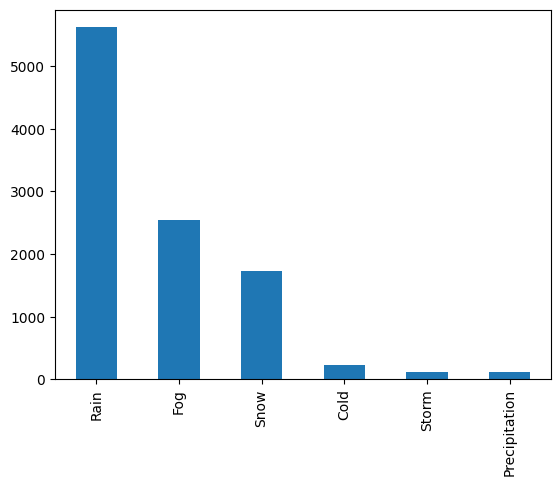

In [192]:
df['Type'].value_counts().plot.bar()

##### Severity column

<AxesSubplot:>

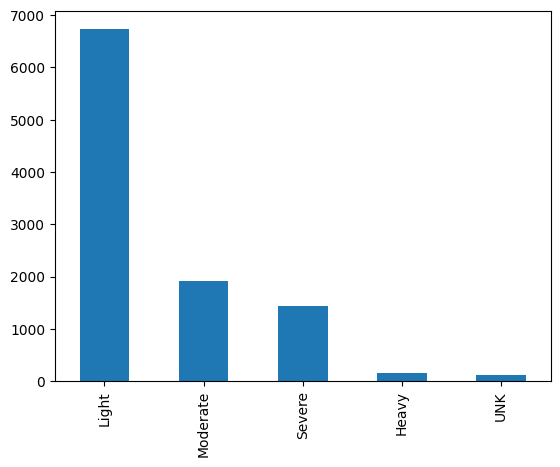

In [193]:
df['Severity'].value_counts().plot.bar()

##### Precipitation column

<AxesSubplot:>

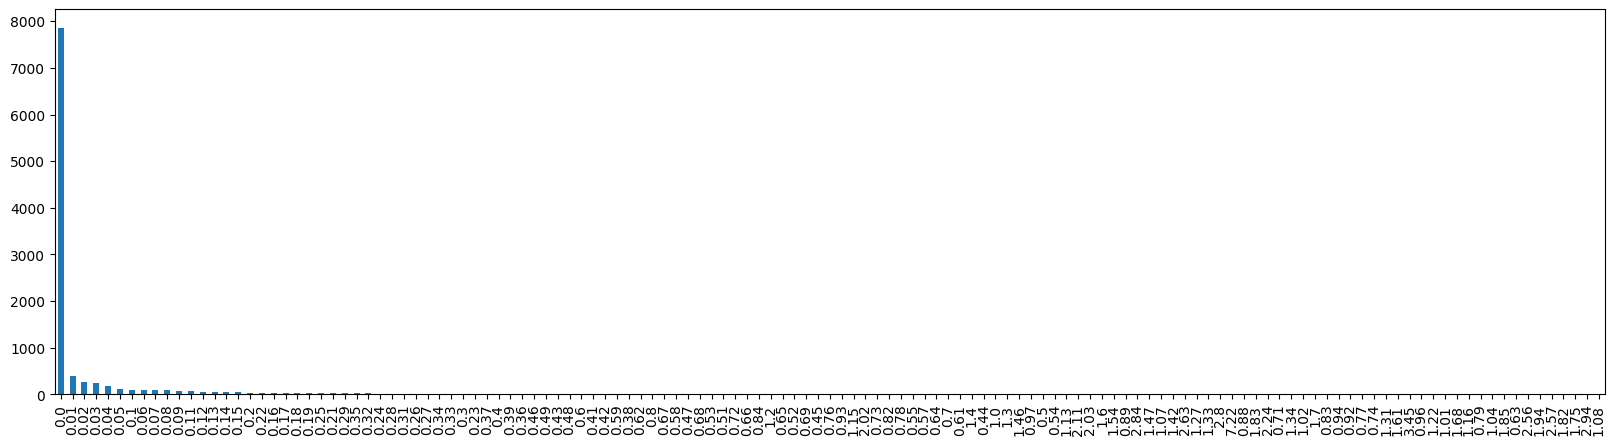

In [194]:
plt.figure(figsize=(20,5))
df['Precipitation(in)'].value_counts().plot.bar()

<AxesSubplot:>

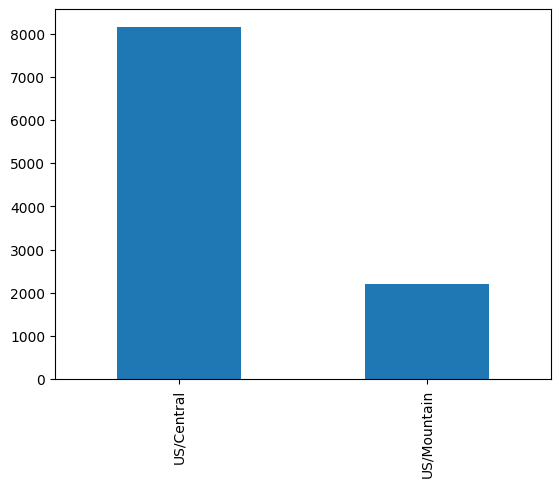

In [195]:
df['TimeZone'].value_counts().plot.bar()

##### TimeZone column

<AxesSubplot:>

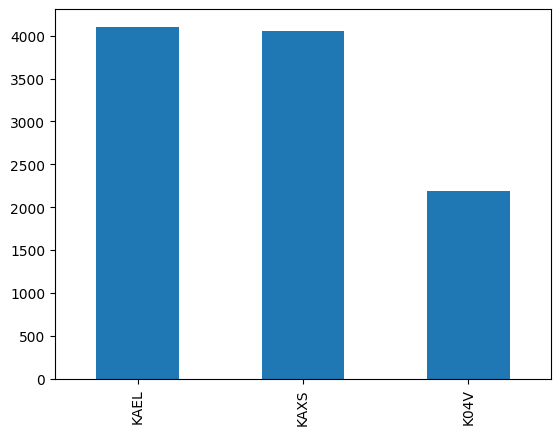

In [196]:
df['AirportCode'].value_counts().plot.bar()

##### Locationlat column

<AxesSubplot:>

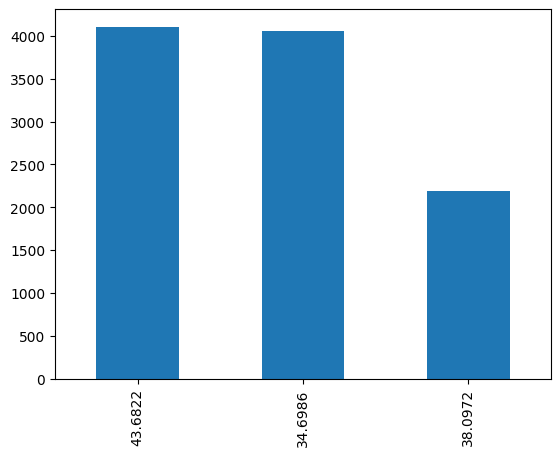

In [197]:
df['LocationLat'].value_counts().plot.bar()

##### locationLng column

<AxesSubplot:>

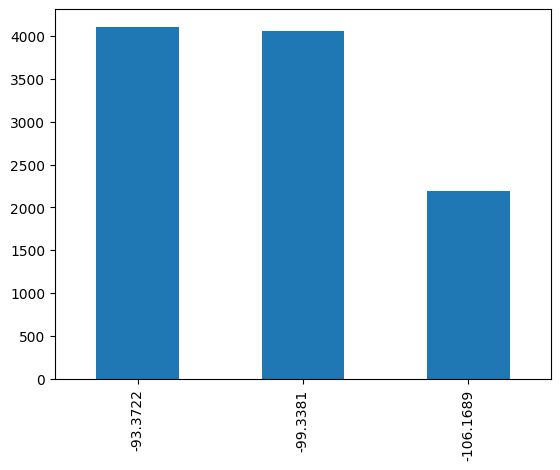

In [198]:
df['LocationLng'].value_counts().plot.bar()

##### city column

<AxesSubplot:>

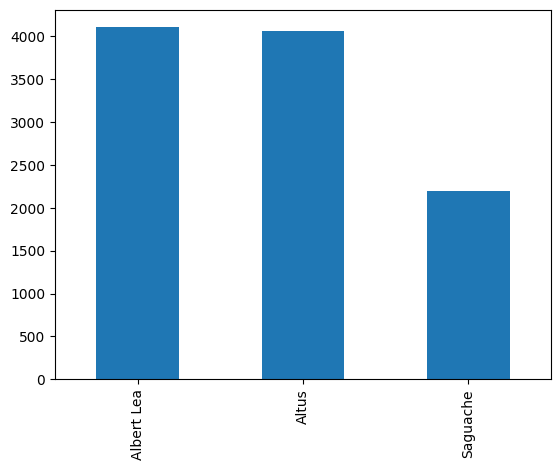

In [199]:
df['City'].value_counts().plot.bar()

##### county column

<AxesSubplot:>

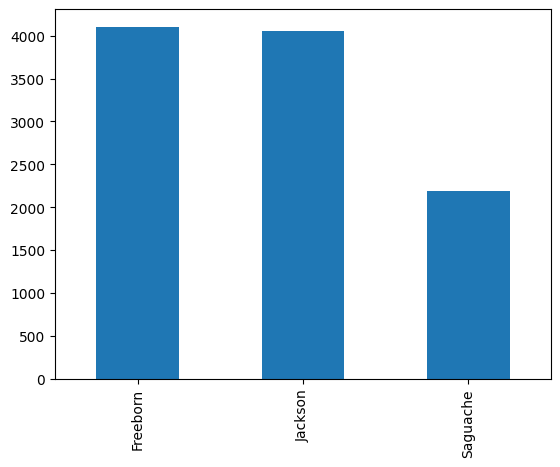

In [200]:
df['County'].value_counts().plot.bar()

##### State column

<AxesSubplot:>

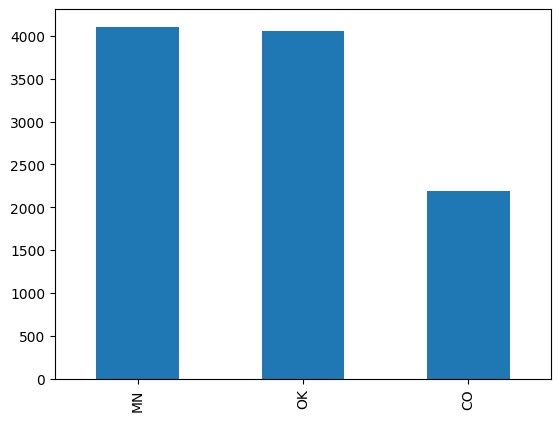

In [201]:
df['State'].value_counts().plot.bar()

##### Zipcode column

<AxesSubplot:>

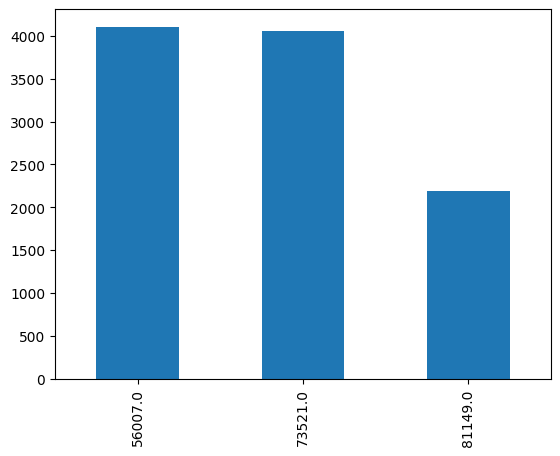

In [202]:
df['ZipCode'].value_counts().plot.bar()

##### start_weekend column

<AxesSubplot:>

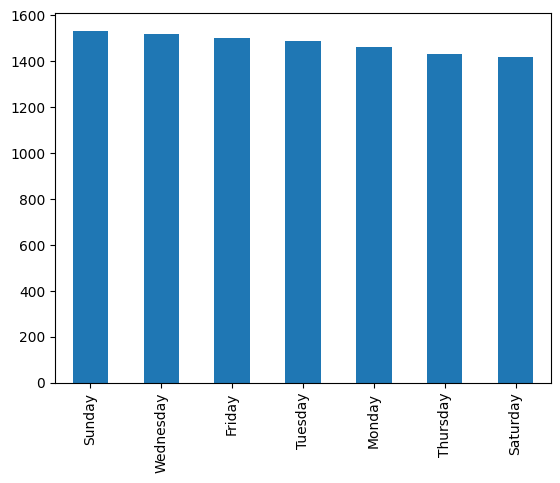

In [203]:
df['start_weekday'].value_counts().plot.bar()

##### end_weekend column

<AxesSubplot:>

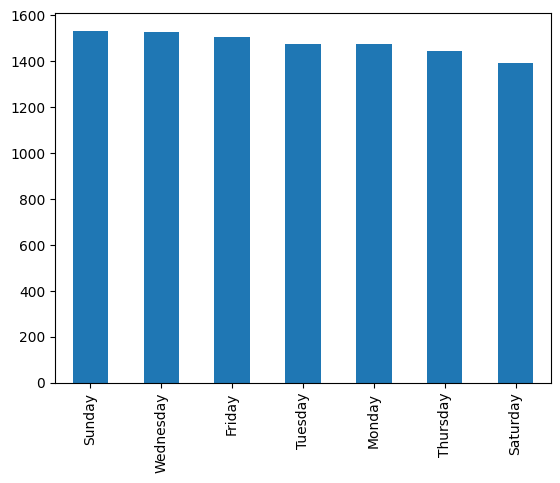

In [204]:
df['end_weekday'].value_counts().plot.bar()

##### start_hour column

<AxesSubplot:>

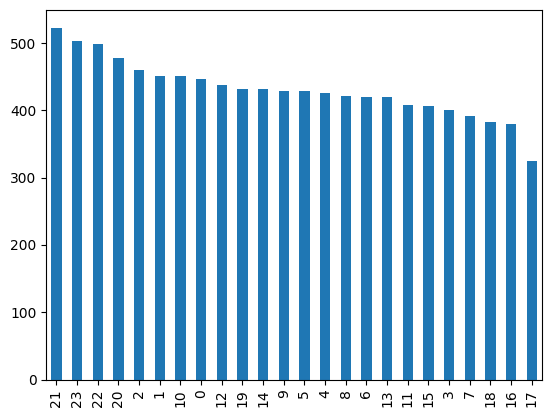

In [205]:
df['start_hour'].value_counts().plot.bar()

##### end_hour column

<AxesSubplot:>

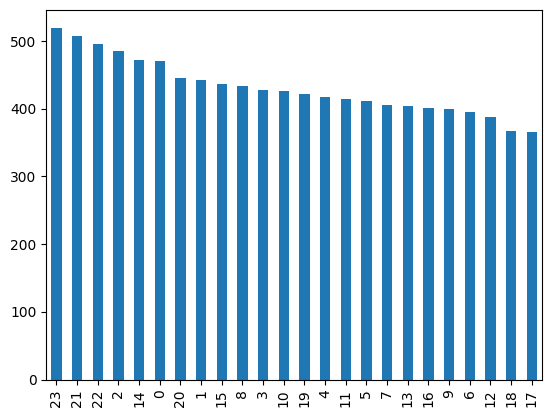

In [206]:
df['end_hour'].value_counts().plot.bar()

##### start_month column

<AxesSubplot:>

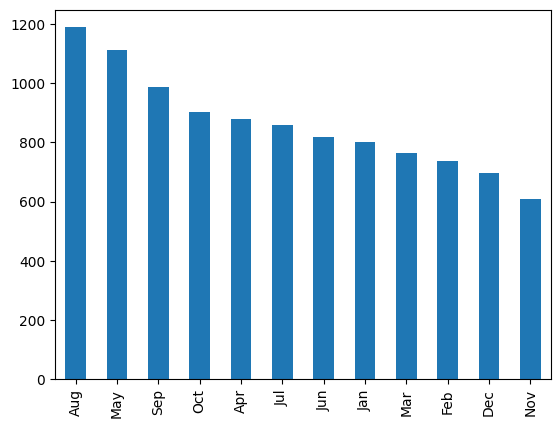

In [207]:
df['start_month'].value_counts().plot.bar()

##### end_month column

<AxesSubplot:>

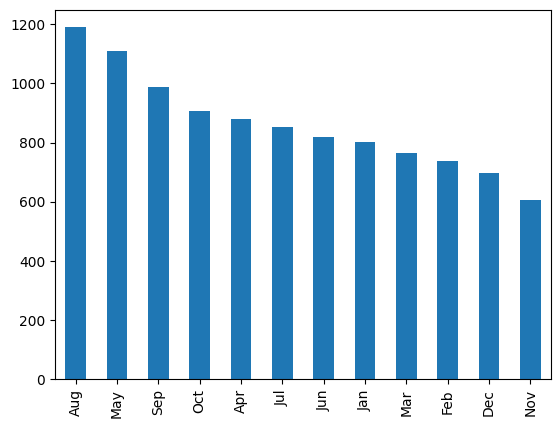

In [208]:
df['end_month'].value_counts().plot.bar()

## C. You must perform PCA for N-Component 3. You must Encode Categorical Features to Numerical representation.

In [209]:
df_prediction=df['Precipitation(in)']
df_features=df.drop(['Precipitation(in)'],axis=1)

In [210]:
df_prediction.head()

0    0.00
1    0.00
2    0.03
3    0.00
4    0.00
Name: Precipitation(in), dtype: float64

In [211]:
df_features.head()

,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,City,County,...,start_date,end_date,start_time,end_time,start_month,end_month,start_hour,end_hour,start_weekday,end_weekday
0,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,...,2016-01-06,2016-01-07,23:14:00,00:34:00,Jan,Jan,23,0,Wednesday,Thursday
1,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,...,2016-01-07,2016-01-07,04:14:00,04:54:00,Jan,Jan,4,4,Thursday,Thursday
2,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,...,2016-01-07,2016-01-07,05:54:00,15:34:00,Jan,Jan,5,15,Thursday,Thursday
3,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,...,2016-01-08,2016-01-08,05:34:00,05:54:00,Jan,Jan,5,5,Friday,Friday
4,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,...,2016-01-08,2016-01-08,13:54:00,15:54:00,Jan,Jan,13,15,Friday,Friday


In [212]:
from sklearn.preprocessing import OneHotEncoder

oh_enc=OneHotEncoder(sparse=False,)
oh_enc_arr=oh_enc.fit_transform(df_features[list(df_features.columns)])
oh_enc_arr

c:\Users\Hamza\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [213]:
from sklearn.preprocessing import StandardScaler

std_oh_enc_arr=StandardScaler().fit_transform(oh_enc_arr)
std_oh_enc_arr

array([[-0.14837787, -0.56991371, -0.10267793, ...,  2.48474207,
        -0.40794918, -0.41597014],
       [-0.14837787, -0.56991371, -0.10267793, ...,  2.48474207,
        -0.40794918, -0.41597014],
       [-0.14837787, -0.56991371, -0.10267793, ...,  2.48474207,
        -0.40794918, -0.41597014],
       ...,
       [-0.14837787, -0.56991371, -0.10267793, ..., -0.40245626,
        -0.40794918,  2.40401868],
       [-0.14837787, -0.56991371, -0.10267793, ...,  2.48474207,
        -0.40794918, -0.41597014],
       [-0.14837787,  1.75465159, -0.10267793, ..., -0.40245626,
        -0.40794918, -0.41597014]])

In [214]:
from sklearn.decomposition import PCA

n_component=PCA(n_components=3)
n_component_std_oh_enc_arr=n_component.fit_transform(std_oh_enc_arr)
n_component_std_oh_enc_arr

array([[ 6.06662485, -3.15375821,  0.06049892],
       [ 6.270084  , -3.00644137, -2.60155009],
       [ 6.24012139, -2.95405577, -3.55753924],
       ...,
       [ 1.3021324 ,  4.08662732, -0.20978893],
       [ 1.21876002,  5.23259271, -2.01945273],
       [ 0.13460037,  4.21969432, -1.84267665]])

In [215]:
pca_df=pd.DataFrame(n_component_std_oh_enc_arr,columns=['c1','c2','c3'])
pca_df

,c1,c2,c3
0,6.066625,-3.153758,0.060499
1,6.270084,-3.006441,-2.601550
2,6.240121,-2.954056,-3.557539
3,6.795293,-2.962292,-2.798887
4,6.675794,-2.658906,-5.330751
...,...,...,...
10347,0.486402,5.475787,-1.681414
10348,1.421408,5.305269,-4.494439
10349,1.302132,4.086627,-0.209789
10350,1.218760,5.232593,-2.019453


In [216]:
new_df=pd.concat([pca_df.reset_index(drop=True),df_prediction.reset_index(drop=True)],axis=1)
new_df

,c1,c2,c3,Precipitation(in)
0,6.066625,-3.153758,0.060499,0.00
1,6.270084,-3.006441,-2.601550,0.00
2,6.240121,-2.954056,-3.557539,0.03
3,6.795293,-2.962292,-2.798887,0.00
4,6.675794,-2.658906,-5.330751,0.00
...,...,...,...,...
10347,0.486402,5.475787,-1.681414,0.00
10348,1.421408,5.305269,-4.494439,0.00
10349,1.302132,4.086627,-0.209789,0.00
10350,1.218760,5.232593,-2.019453,0.00


### D. By this Point you will have 4 columns including prediction column.
### You must plot following 3 Scatter Plots

### i. A: (X1, Y)
### ii. B: (X2, Y)
### iii. C: (X3, Y)

##### C1 vs Precipitation

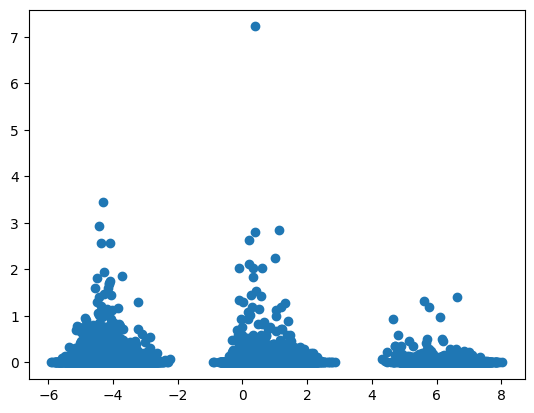

In [217]:
import matplotlib.pyplot as plt

plt.scatter(new_df['c1'],new_df['Precipitation(in)'])
plt.show()

##### C2 vs Precipitation

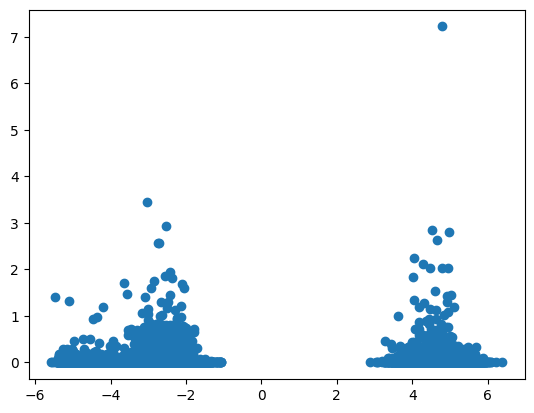

In [218]:
plt.scatter(new_df['c2'],new_df['Precipitation(in)'])
plt.show()

##### C3 vs Precipitation

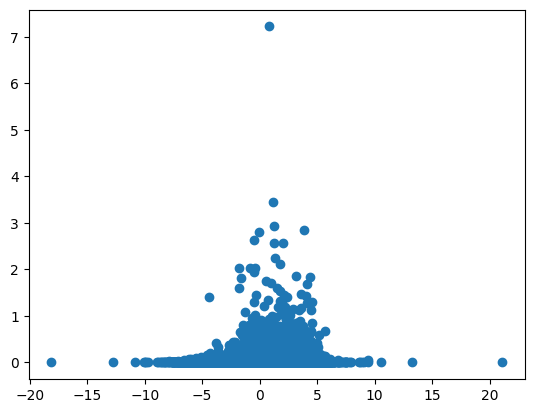

In [219]:
plt.scatter(new_df['c3'],new_df['Precipitation(in)'])
plt.show()